In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs

### 1D

In [11]:
data = np.random.normal(0.0, 1.0, 100)

In [127]:
class KDE(object):
    def __init__(self, kernel):
        self.kernel = kernel
    def fit(self, data):
        self.data = data
        self.m = data.shape[0]
        self.h = .5 #if self.kernel == 'gaussian' else .6  np.std(data) * (4 / (3 * self.m))**0.2
        return self
    def pdf(self, xx):
        res = np.zeros_like(xx)
        if self.kernel == 'gaussian':
            temp = np.mean(np.exp(-.5 * ((xx.repeat(self.m).reshape(-1, self.m) - self.data) / self.h)**2), axis=1)
            result = temp / ((2 * np.pi)**0.5 * self.h)
        if self.kernel == 'epanechnikov':
            r = (xx.repeat(self.m).reshape(-1, self.m) - self.data) / self.h
            temp = .75 * (1 - r**2)
            temp[np.logical_or(r < -1, r > 1)] = 0 #mask
            result = np.mean(temp, axis=1) / self.h
        return result

In [68]:
KDE(kernel='gaussian').fit(data)

0.36473011462426136


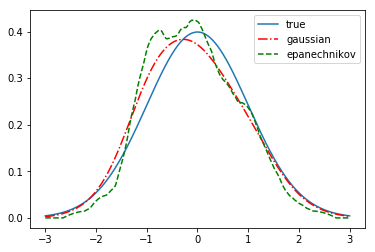

In [132]:
xx = np.linspace(-3, 3, 400)
pdf_tru = np.exp(-xx*xx/2) / np.sqrt(2*np.pi)
kde1 = KDE(kernel = 'gaussian').fit(data)
kde2 = KDE(kernel = 'epanechnikov').fit(data)
plt.plot(xx, pdf_tru, label='true')
plt.plot(xx, kde1.pdf(xx), '-.k', c='r', label='gaussian')
plt.plot(xx, kde2.pdf(xx), '--k', c='g', label='epanechnikov')
plt.legend();

In [60]:
from scipy.stats import norm

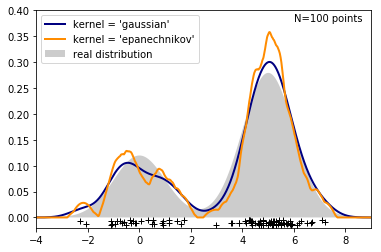

In [129]:
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))#[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)#[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot)
             + 0.7 * norm(5, 1).pdf(X_plot))

fig, ax = plt.subplots()
ax.fill(X_plot, true_dens, fc='black', alpha=0.2,
        label='real distribution')
colors = ['navy', 'darkorange']
kernels = ['gaussian', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KDE(kernel=kernel).fit(X)
    dens = kde.pdf(X_plot)
    ax.plot(X_plot, dens, color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X, -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

### 2D

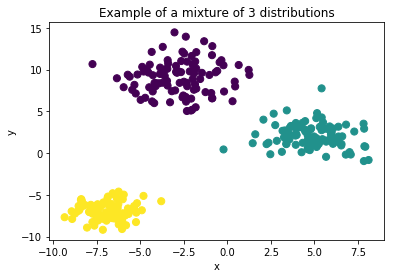

In [2]:
n_components = 3
X, truth = make_blobs(n_samples=300, centers=n_components, 
                      cluster_std = [2, 1.5, 1], 
                      random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50, c = truth)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y");

In [3]:
# Extract x and y
x = X[:, 0]
y = X[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-11.097585529030251 9.858180523990058 -11.545696279950441 16.81828998331647


In [4]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

In [6]:
from mpl_toolkits.mplot3d import Axes3D

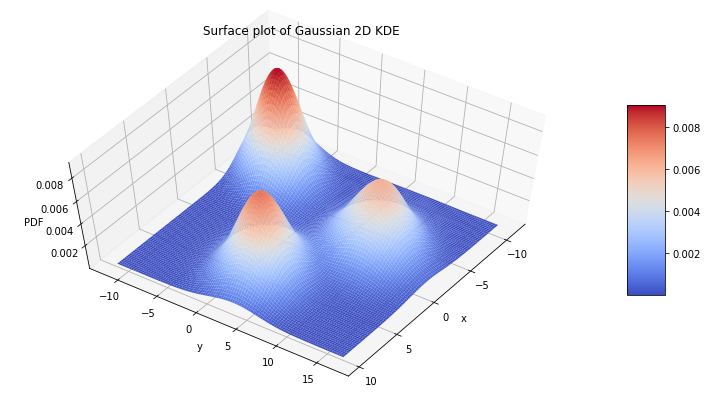

In [7]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) 
ax.view_init(60, 35)

In [8]:
from sklearn.neighbors import KernelDensity

In [12]:
def kde2D(x, y, bandwidth, kernel, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, kernel=kernel, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

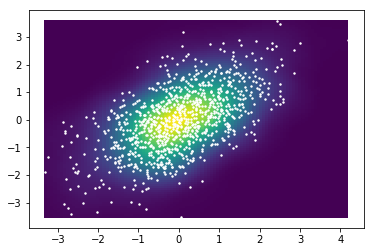

In [13]:
m1 = np.random.normal(size=1000)
m2 = np.random.normal(scale=0.5, size=1000)

x, y = m1 + m2, m1 - m2

xx, yy, zz = kde2D(x, y, 1.0, 'epanechnikov')

plt.pcolormesh(xx, yy, zz)
plt.scatter(x, y, s=2, facecolor='white');